In [1]:
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
from collections import Counter

/home/ebrahim/brainaudio/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer = AutoTokenizer.from_pretrained("HuggingFaceTB/SmolLM2-135M")

In [3]:
# Load lexicon and extract words
print("Loading lexicon...")
words = []
with open("/data2/brain2text/lm/lexicon_phonemes.txt", "r") as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        # Word is the first token before the phonemes
        word = line.split()[0]
        words.append(word)

print(f"Loaded {len(words)} words")

Loading lexicon...
Loaded 125074 words


In [4]:
# Compute token counts for each word
print("Computing token counts...")
token_counts = []
for word in words:
    tokens = tokenizer.encode(word, add_special_tokens=False)
    token_counts.append(len(tokens))

Computing token counts...


In [5]:
# Statistics
count_distribution = Counter(token_counts)
print(f"Token count distribution:")
for count in sorted(count_distribution.keys()):
    print(f"  {count} tokens: {count_distribution[count]} words")

print(f"\nMin tokens: {min(token_counts)}")
print(f"Max tokens: {max(token_counts)}")
print(f"Mean tokens: {sum(token_counts) / len(token_counts):.2f}")

Token count distribution:
  1 tokens: 5171 words
  2 tokens: 56688 words
  3 tokens: 49867 words
  4 tokens: 11542 words
  5 tokens: 1543 words
  6 tokens: 217 words
  7 tokens: 39 words
  8 tokens: 5 words
  9 tokens: 1 words
  11 tokens: 1 words

Min tokens: 1
Max tokens: 11
Mean tokens: 2.59


In [6]:
# Group words by token count
from collections import defaultdict

words_by_token_count = defaultdict(list)
for word, count in zip(words, token_counts):
    words_by_token_count[count].append(word)

# Print sample words for each token count
num_examples = 10  # Change this to see more/fewer examples
for count in sorted(words_by_token_count.keys()):
    word_list = words_by_token_count[count]
    examples = word_list[:num_examples]
    print(f"\n{count} token(s) ({len(word_list)} words): {', '.join(examples)}")


1 token(s) (11575 words): aaa, aa, a, abad, ab, aba, abandon, abba, abbas, abbe

2 token(s) (73331 words): 3d, aachen, aah, aaker, aardema, aargh, aaron, aarons, aaronson, aarti

3 token(s) (32007 words): 3-d, aaberg, aachener, aaliyah, aalseth, aamodt, aancor, aardvark, aardvarks, abalkin

4 token(s) (6823 words): aaron's, aaronson's, abbey's, abbott's, abbruzzese, abercrombie, abiam's, abiola's, abkhazian, abkhazians

5 token(s) (1186 words): abuellah's, aburto's, addis-ababa, adl-tabataba, ad-nauseam, ad-nauseum, adviser's, aeroflot's, aeroperu's, aerosmith's

6 token(s) (131 words): a42128, abouhalima's, adl-tabatabai, aeromexico's, aerospatiale's, aliquippa's, anacostia's, anglo-catholicism, baryshnikov's, baton-rouge's

7 token(s) (18 words): aix-en-provence, aix-la-chapelle, burkina-faso's, cat-o-nine-tails, chattahoochee's, d'alessandro's, harnischfeger's, kebab-n-curry, kebab-n-kurry, middle-of-the-road

8 token(s) (2 words): ring-around-the-rosy, son-of-a-bitch

10 token(s) 

In [7]:
# Show token breakdown for multi-token words
num_examples_per_group = 5  # How many words to show per token count

for count in sorted(words_by_token_count.keys()):
    if count == 1:
        continue  # Skip single-token words
    print(f"\n=== {count} token words ===")
    for word in words_by_token_count[count][:num_examples_per_group]:
        token_ids = tokenizer.encode(word, add_special_tokens=False)
        tokens = [tokenizer.decode([t]) for t in token_ids]
        print(f"  {word}: {tokens}")


=== 2 token words ===
  3d: ['3', 'd']
  aachen: ['a', 'achen']
  aah: ['a', 'ah']
  aaker: ['a', 'aker']
  aardema: ['aard', 'ema']

=== 3 token words ===
  3-d: ['3', '-', 'd']
  aaberg: ['a', 'ab', 'erg']
  aachener: ['a', 'achen', 'er']
  aaliyah: ['a', 'ali', 'yah']
  aalseth: ['aal', 'set', 'h']

=== 4 token words ===
  aaron's: ['a', 'aron', "'", 's']
  aaronson's: ['aar', 'onson', "'", 's']
  abbey's: ['abb', 'ey', "'", 's']
  abbott's: ['abb', 'ott', "'", 's']
  abbruzzese: ['abb', 'ru', 'zz', 'ese']

=== 5 token words ===
  abuellah's: ['abu', 'ell', 'ah', "'", 's']
  aburto's: ['ab', 'ur', 'to', "'", 's']
  addis-ababa: ['add', 'is', '-', 'ab', 'aba']
  adl-tabataba: ['adl', '-', 'tab', 'at', 'aba']
  ad-nauseam: ['ad', '-', 'n', 'ause', 'am']

=== 6 token words ===
  a42128: ['a', '4', '2', '1', '2', '8']
  abouhalima's: ['ab', 'ou', 'hal', 'ima', "'", 's']
  adl-tabatabai: ['adl', '-', 'tab', 'at', 'ab', 'ai']
  aeromexico's: ['aer', 'om', 'ex', 'ico', "'", 's']
  aerospa

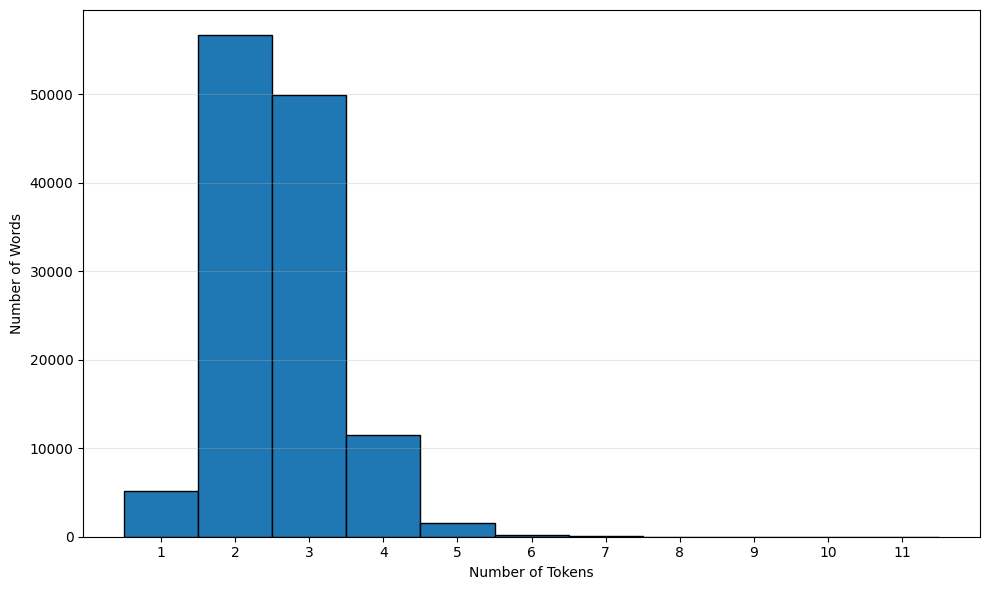

In [7]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(token_counts, bins=range(1, max(token_counts) + 2), edgecolor='black', align='left')
plt.xlabel("Number of Tokens")
plt.ylabel("Number of Words")
plt.xticks(range(1, max(token_counts) + 1))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()